In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-9364007-0003.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-1135262-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-9476607-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-2831144-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-7720431-0003.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-1514320-0002.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-6950003-0003.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-874167-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-4276353-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-9857270-0004.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-3565661-000

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
import random

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


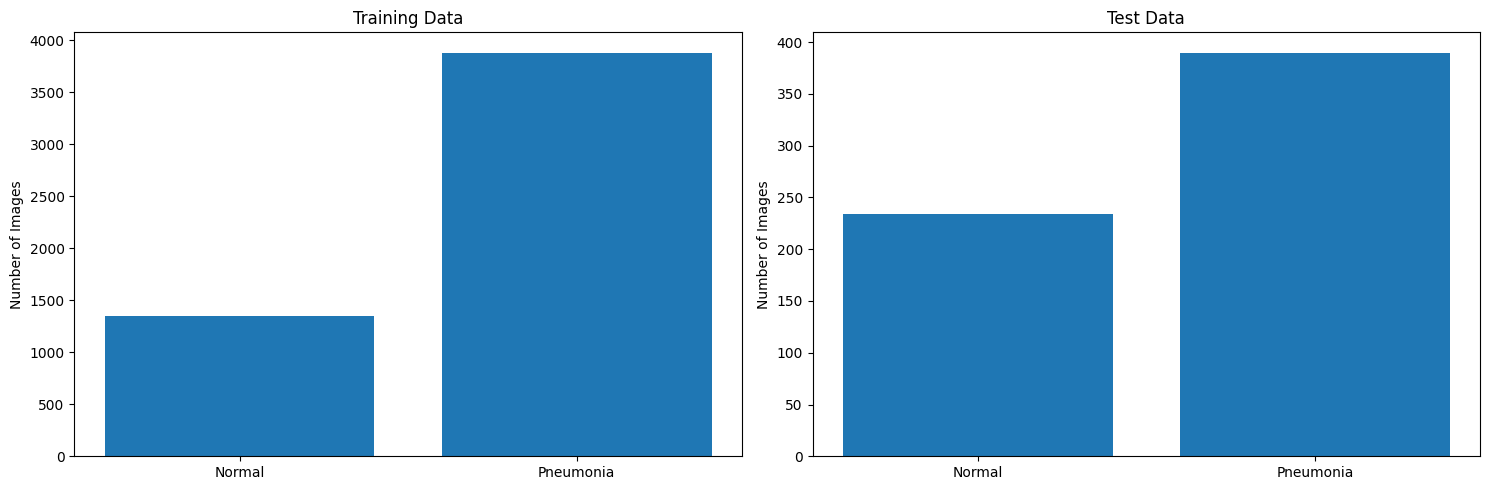

In [3]:
train_normal_data_count = len(os.listdir('/kaggle/input/labeled-chest-xray-images/chest_xray/train/NORMAL'))
train_pneumonia_data_count = len(os.listdir('/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA'))

test_normal_data_count = len(os.listdir('/kaggle/input/labeled-chest-xray-images/chest_xray/test/NORMAL'))
test_pneumonia_data_count = len(os.listdir('/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA'))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].bar(['Normal', 'Pneumonia'], [train_normal_data_count, train_pneumonia_data_count])
axs[0].set_title('Training Data')
axs[0].set_ylabel('Number of Images')

axs[1].bar(['Normal', 'Pneumonia'], [test_normal_data_count, test_pneumonia_data_count])
axs[1].set_title('Test Data')
axs[1].set_ylabel('Number of Images')

plt.tight_layout()
plt.show()

In [4]:
train_normal_dir = '/kaggle/input/labeled-chest-xray-images/chest_xray/train/NORMAL'
train_pneumonia_dir = '/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA'

# Function to display random images from a category
def display_random_images(category_dir, category_name, num_images=10):
    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        # Get a random image file from the directory
        img_file = random.choice(os.listdir(category_dir))
        img_path = os.path.join(category_dir, img_file)

        # Create a subplot for each image
        plt.subplot(2, 5, i + 1)
        img = mpimg.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

    plt.show()

NORMAL IMAGES


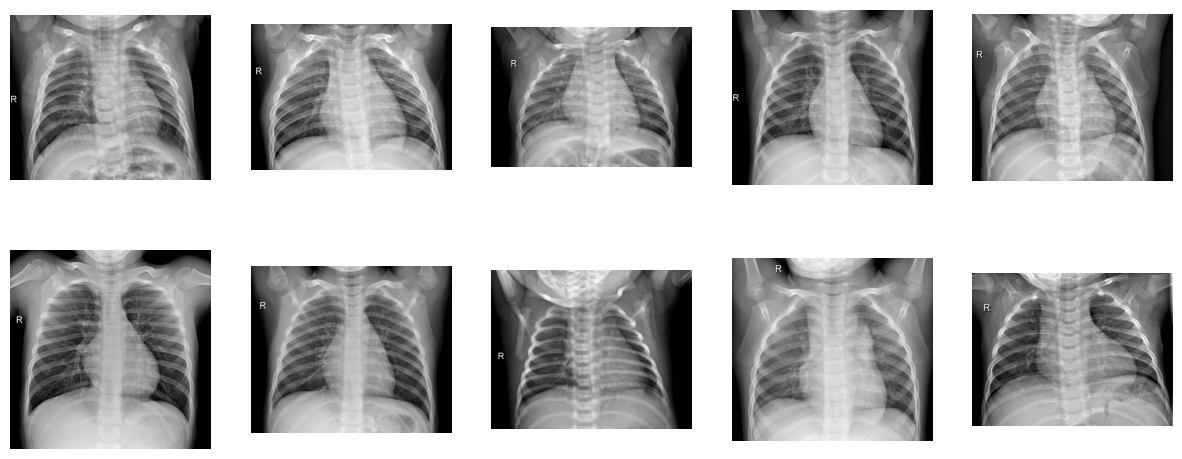

In [5]:
print("NORMAL IMAGES")
display_random_images(train_normal_dir, 'Normal')

PNEUMONIA IMAGES


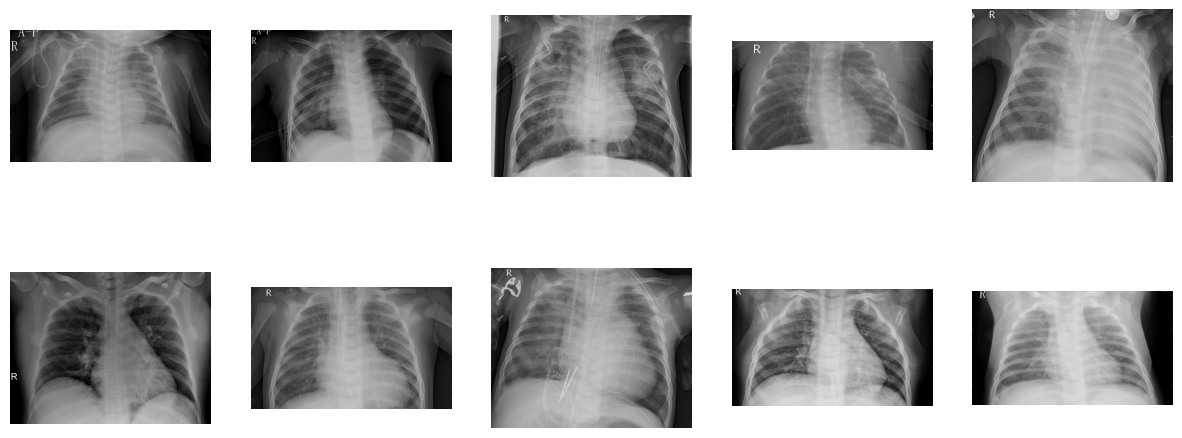

In [6]:
print("PNEUMONIA IMAGES")
display_random_images(train_pneumonia_dir, 'Pneumonia')

In [7]:
image_dir = '/kaggle/input/labeled-chest-xray-images/chest_xray/train/NORMAL'
max_height = 0
max_width = 0
min_height = float('inf')
min_width = float('inf')

temp = os.listdir(image_dir)
for i in range(len(temp)):
    img_file = temp[i]
    img_path = os.path.join(image_dir, img_file)
    image = mpimg.imread(img_path)

    height, width = image.shape

    max_height = max(max_height, height)
    max_width = max(max_width, width)
    min_height = min(min_height, height)
    min_width = min(min_width, width)

print(f"Maximum Height: {max_height}")
print(f"Maximum Width: {max_width}")
print(f"Minimum Height: {min_height}")
print(f"Minimum Width: {min_width}")

Maximum Height: 2663
Maximum Width: 2916
Minimum Height: 672
Minimum Width: 912


In [33]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 10,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    fill_mode ="constant",
    zoom_range = 0.2,
    shear_range = 0.2,
    brightness_range=[0.90, 1.10],
    #preprocessing_function =tf.keras.applications.efficientnet.preprocess_input
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255.0
    #preprocessing_function =tf.keras.applications.efficientnet.preprocess_input
)

In [34]:
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/labeled-chest-xray-images/chest_xray/train/',
    color_mode = 'rgb',
    class_mode = 'binary',
    target_size = (256,256),
    batch_size = 64,
    seed = 42
)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/labeled-chest-xray-images/chest_xray/test/',
    color_mode = 'rgb',
    class_mode = 'binary',
    target_size = (256,256),
    batch_size = 32,
    seed = 42,
    shuffle = False
)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


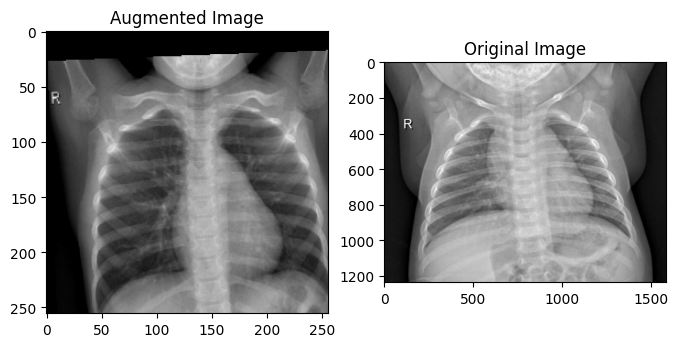

In [35]:
import matplotlib.pyplot as plt

# Load a sample image
sample_image, _ = next(train_generator)

# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_image[1])
plt.title("Augmented Image")

# Display the augmented image
plt.subplot(1, 2, 2)
plt.title("Original Image")

img_file = os.listdir(train_normal_dir)[1]
img_path = os.path.join(train_normal_dir, img_file)
# Create a subplot for each image
img = mpimg.imread(img_path)
plt.imshow(img, cmap='gray')
plt.show()


In [36]:
true_labels = test_generator.classes

**TRAINING MODEL1 -> DENSENET-169**

In [82]:
densenet169 = tf.keras.applications.DenseNet169(
    include_top=False,
    weights="imagenet",
    input_shape = (256,256,3)
)

51877672/51877672 [==============================] - 0s 0us/step


In [ ]:
densenet169.summary()

In [83]:
for layer in densenet169.layers:
  layer.trainable = False

In [84]:
x1 = tf.keras.layers.Flatten()(densenet169.output)
x1 = tf.keras.layers.Dense(32, activation='relu')(x1)
x1 = tf.keras.layers.Dropout(0.2)(x1)
prediction1 = tf.keras.layers.Dense(1,activation='sigmoid')(x1)
model1 = tf.keras.models.Model(densenet169.input, prediction1)

In [42]:
# Precision
precision = tf.keras.metrics.Precision()

# Recall
recall = tf.keras.metrics.Recall()

In [85]:
model1.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
               loss = tf.keras.losses.BinaryFocalCrossentropy(gamma=3),
               metrics = ['accuracy', precision, recall]
               )

In [80]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [87]:
history1 = model1.fit(
    train_generator,
    validation_data = test_generator,
    epochs = 12,
    verbose = 2,
    callbacks = [callback]
)

Epoch 1/12
82/82 - 125s - loss: 0.0164 - accuracy: 0.9623 - precision: 0.9740 - recall: 0.9753 - val_loss: 0.0421 - val_accuracy: 0.9471 - val_precision: 0.9661 - val_recall: 0.9487 - 125s/epoch - 2s/step
Epoch 2/12
82/82 - 126s - loss: 0.0184 - accuracy: 0.9591 - precision: 0.9688 - recall: 0.9763 - val_loss: 0.0244 - val_accuracy: 0.9359 - val_precision: 0.9679 - val_recall: 0.9282 - 126s/epoch - 2s/step
Epoch 3/12
82/82 - 129s - loss: 0.0166 - accuracy: 0.9618 - precision: 0.9745 - recall: 0.9740 - val_loss: 0.0442 - val_accuracy: 0.9407 - val_precision: 0.9514 - val_recall: 0.9538 - 129s/epoch - 2s/step
Epoch 4/12
82/82 - 127s - loss: 0.0171 - accuracy: 0.9572 - precision: 0.9702 - recall: 0.9722 - val_loss: 0.0364 - val_accuracy: 0.9455 - val_precision: 0.9450 - val_recall: 0.9692 - 127s/epoch - 2s/step


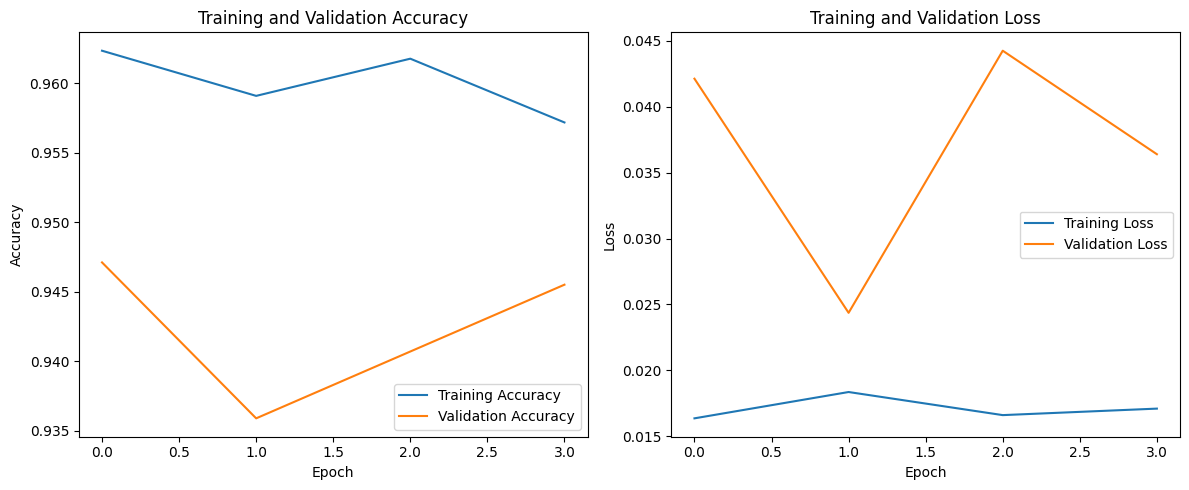

In [88]:
accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy'] 
loss = history1.history['loss']
val_loss = history1.history['val_loss']

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [89]:
model1.save('densenet169.h5')

In [90]:
predictions = model1.predict(test_generator)

20/20 [==============================] - 9s 293ms/step


In [91]:
threshold = 0.5
predicted_labels = (predictions > threshold).astype(int)

Confusion Matrix:
[[212  22]
 [ 12 378]]
F1 Score: 0.9569620253164557


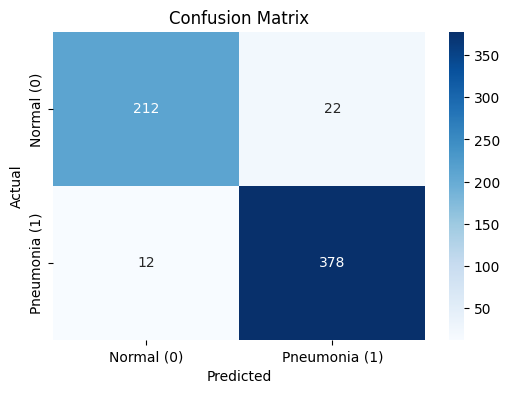

In [92]:
confusion = confusion_matrix(true_labels, predicted_labels)

# Compute F1 score
f1 = f1_score(true_labels, predicted_labels)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("F1 Score:", f1)

# Create a heatmap for the confusion matrix using Seaborn
labels = ['Normal (0)', 'Pneumonia (1)']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**MODEL2 -> RESNET50v2**

In [93]:
resnet50 = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3),
)

94668760/94668760 [==============================] - 0s 0us/step


In [67]:
resnet50.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [94]:
for layer in resnet50.layers:
  layer.trainable = False

In [95]:
x2 = tf.keras.layers.Flatten()(resnet50.output)
x2 = tf.keras.layers.Dense(32, activation='relu')(x2)
x2 = tf.keras.layers.Dropout(0.2)(x2)
prediction2 = tf.keras.layers.Dense(1,activation='sigmoid')(x2)
model2 = tf.keras.models.Model(resnet50.input, prediction2)

In [96]:
model2.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001),
               loss = tf.keras.losses.BinaryFocalCrossentropy(gamma=3.0),
               metrics = ['accuracy', precision, recall]
               )

In [98]:
history2 = model2.fit(
    train_generator,
    validation_data = test_generator,
    epochs = 15,
    verbose = 2,
    callbacks = [callback]
)

Epoch 1/15
82/82 - 130s - loss: 0.1357 - accuracy: 0.8509 - precision: 0.9058 - recall: 0.8918 - val_loss: 0.0298 - val_accuracy: 0.9279 - val_precision: 0.9600 - val_recall: 0.9231 - 130s/epoch - 2s/step
Epoch 2/15
82/82 - 125s - loss: 0.0330 - accuracy: 0.9214 - precision: 0.9467 - recall: 0.9475 - val_loss: 0.0303 - val_accuracy: 0.9135 - val_precision: 0.9773 - val_recall: 0.8821 - 125s/epoch - 2s/step
Epoch 3/15
82/82 - 126s - loss: 0.0267 - accuracy: 0.9270 - precision: 0.9522 - recall: 0.9493 - val_loss: 0.0284 - val_accuracy: 0.9054 - val_precision: 0.9715 - val_recall: 0.8744 - 126s/epoch - 2s/step
Epoch 4/15
82/82 - 127s - loss: 0.0270 - accuracy: 0.9379 - precision: 0.9611 - recall: 0.9549 - val_loss: 0.0235 - val_accuracy: 0.9391 - val_precision: 0.9335 - val_recall: 0.9718 - 127s/epoch - 2s/step
Epoch 5/15
82/82 - 124s - loss: 0.0235 - accuracy: 0.9392 - precision: 0.9588 - recall: 0.9593 - val_loss: 0.0223 - val_accuracy: 0.9391 - val_precision: 0.9536 - val_recall: 0.948

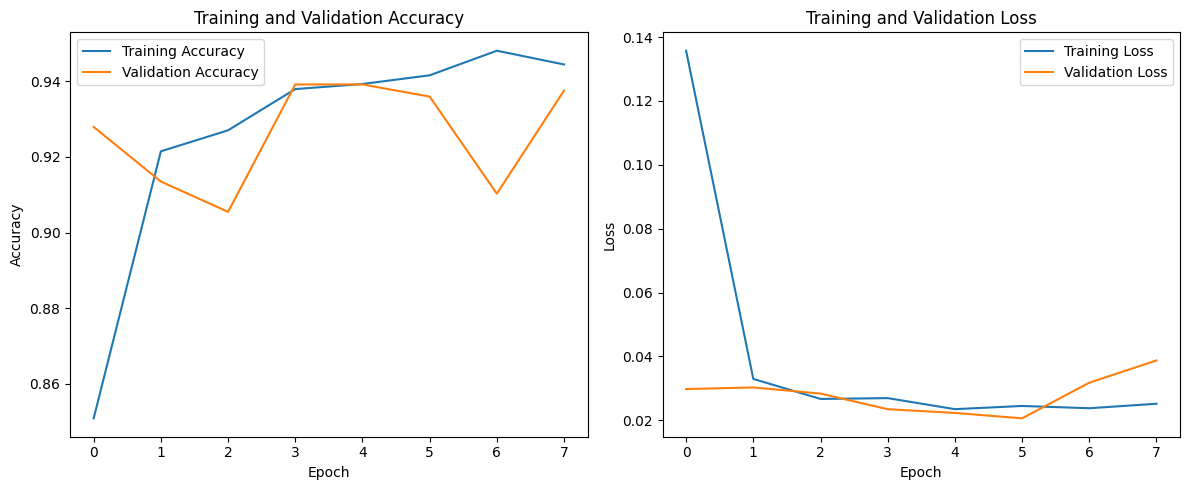

In [99]:
accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [100]:
model2.save('resnet50v2.h5')

In [101]:
predictions = model2.predict(test_generator)

20/20 [==============================] - 7s 302ms/step


In [102]:
threshold = 0.5
predicted_labels = (predictions > threshold).astype(int)

Confusion Matrix:
[[201  33]
 [  6 384]]
F1 Score: 0.9516728624535317


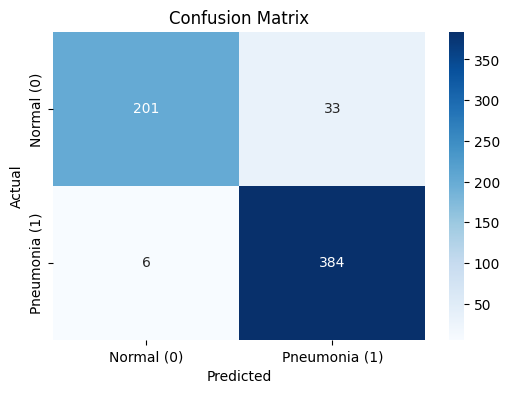

In [103]:
confusion = confusion_matrix(true_labels, predicted_labels)

# Compute F1 score
f1 = f1_score(true_labels, predicted_labels)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("F1 Score:", f1)

# Create a heatmap for the confusion matrix using Seaborn
labels = ['Normal (0)', 'Pneumonia (1)']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**MODEL3 -> INCEPTION-RESNET-V2**

In [37]:
incpnet = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3),
)

219055592/219055592 [==============================] - 1s 0us/step


In [38]:
incpnet.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                               

In [39]:
for layer in incpnet.layers:
    layer.trainable = False

In [40]:
x3 = tf.keras.layers.Flatten()(incpnet.output)
x3 = tf.keras.layers.Dense(32, activation='relu')(x3)
x3 = tf.keras.layers.Dropout(0.2)(x3)
prediction3 = tf.keras.layers.Dense(1,activation='sigmoid')(x3)
model3 = tf.keras.models.Model(incpnet.input, prediction3)

In [43]:
model3.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001),
               loss = tf.keras.losses.BinaryFocalCrossentropy(gamma=3),
               metrics = ['accuracy',precision,recall]
               )

In [46]:
history3 = model3.fit(
    train_generator,
    validation_data = test_generator,
    epochs = 40,
    verbose = 2,
    callbacks = [callback]
)

Epoch 1/40
82/82 - 217s - loss: 0.2210 - accuracy: 0.7754 - precision: 0.8230 - recall: 0.8885 - val_loss: 0.0553 - val_accuracy: 0.8077 - val_precision: 0.7733 - val_recall: 0.9795 - 217s/epoch - 3s/step
Epoch 2/40
82/82 - 134s - loss: 0.0424 - accuracy: 0.8540 - precision: 0.8732 - recall: 0.9397 - val_loss: 0.0465 - val_accuracy: 0.8814 - val_precision: 0.8709 - val_recall: 0.9513 - 134s/epoch - 2s/step
Epoch 3/40
82/82 - 133s - loss: 0.0351 - accuracy: 0.8909 - precision: 0.9061 - recall: 0.9516 - val_loss: 0.0409 - val_accuracy: 0.8750 - val_precision: 0.8467 - val_recall: 0.9769 - 133s/epoch - 2s/step
Epoch 4/40
82/82 - 131s - loss: 0.0333 - accuracy: 0.9012 - precision: 0.9222 - recall: 0.9467 - val_loss: 0.0293 - val_accuracy: 0.9038 - val_precision: 0.9231 - val_recall: 0.9231 - 131s/epoch - 2s/step
Epoch 5/40
82/82 - 130s - loss: 0.0294 - accuracy: 0.9111 - precision: 0.9316 - recall: 0.9500 - val_loss: 0.0397 - val_accuracy: 0.8734 - val_precision: 0.9844 - val_recall: 0.810

In [47]:
model3.save('inception_resnetv2.h5')

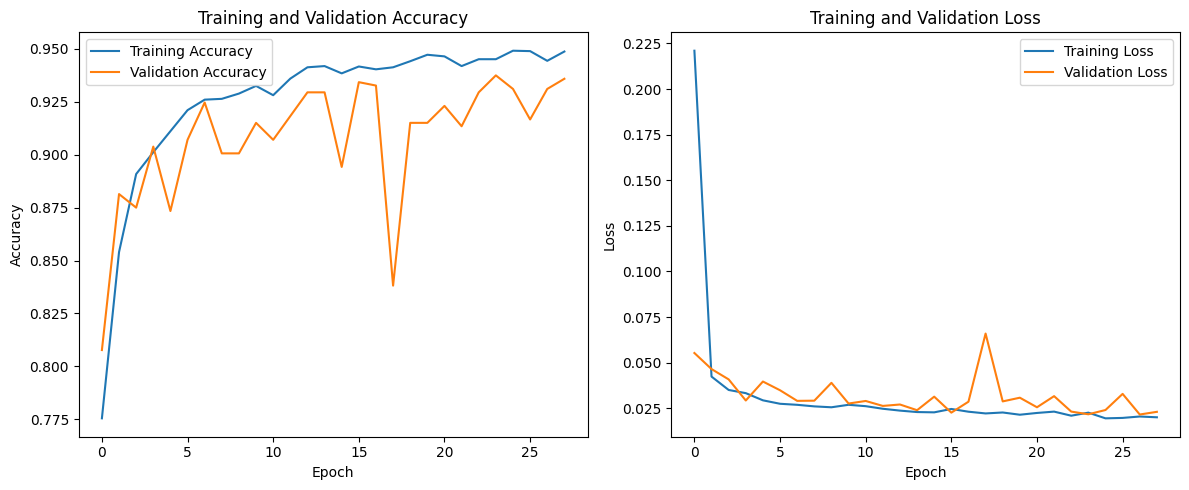

In [48]:
accuracy = history3.history['accuracy']
val_accuracy = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
predictions = model3.predict(test_generator)

20/20 [==============================] - 10s 309ms/step


In [50]:
predicted_labels = (predictions>0.5).astype(int)

Confusion Matrix:
[[213  21]
 [ 19 371]]
F1 Score: 0.9488491048593349


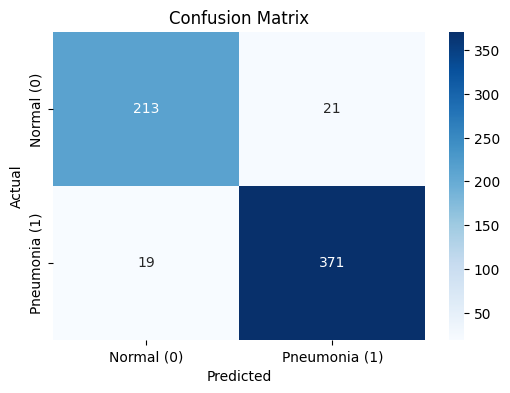

In [51]:
confusion = confusion_matrix(true_labels, predicted_labels)

# Compute F1 score
f1 = f1_score(true_labels, predicted_labels)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("F1 Score:", f1)

# Create a heatmap for the confusion matrix using Seaborn
labels = ['Normal (0)', 'Pneumonia (1)']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**MODEL4 -> INCEPTIONV3**

In [52]:
incpv3 = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3),
)

87910968/87910968 [==============================] - 0s 0us/step


In [56]:
x4 = tf.keras.layers.Flatten()(incpv3.output)
x4 = tf.keras.layers.Dense(32, activation='relu')(x4)
x4 = tf.keras.layers.BatchNormalization()(x4)
x4 = tf.keras.layers.Dropout(0.3)(x4)
prediction4 = tf.keras.layers.Dense(1,activation='sigmoid')(x4)
model4 = tf.keras.models.Model(incpv3.input, prediction4)

In [57]:
model4.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001),
               loss = tf.keras.losses.BinaryFocalCrossentropy(gamma=3),
               metrics = ['accuracy',precision,recall]
               )

In [63]:
history4 = model4.fit(
    train_generator,
    validation_data = test_generator,
    epochs = 10,
    verbose = 2,
    callbacks = [callback]
)

Epoch 1/10
82/82 - 127s - loss: 0.0014 - accuracy: 0.9958 - precision: 0.9964 - recall: 0.9979 - val_loss: 0.0659 - val_accuracy: 0.9503 - val_precision: 0.9838 - val_recall: 0.9359 - 127s/epoch - 2s/step
Epoch 2/10
82/82 - 134s - loss: 0.0017 - accuracy: 0.9968 - precision: 0.9979 - recall: 0.9977 - val_loss: 0.3235 - val_accuracy: 0.8622 - val_precision: 0.9935 - val_recall: 0.7846 - 134s/epoch - 2s/step
Epoch 3/10
82/82 - 138s - loss: 0.0030 - accuracy: 0.9929 - precision: 0.9943 - recall: 0.9961 - val_loss: 0.0528 - val_accuracy: 0.9231 - val_precision: 0.8995 - val_recall: 0.9872 - 138s/epoch - 2s/step
Epoch 4/10
82/82 - 137s - loss: 0.0010 - accuracy: 0.9977 - precision: 0.9990 - recall: 0.9979 - val_loss: 0.0693 - val_accuracy: 0.9551 - val_precision: 0.9866 - val_recall: 0.9410 - 137s/epoch - 2s/step
Epoch 5/10
82/82 - 131s - loss: 0.0025 - accuracy: 0.9941 - precision: 0.9956 - recall: 0.9964 - val_loss: 0.0411 - val_accuracy: 0.9663 - val_precision: 0.9792 - val_recall: 0.966

In [64]:
predictions = model4.predict(test_generator)

20/20 [==============================] - 7s 339ms/step


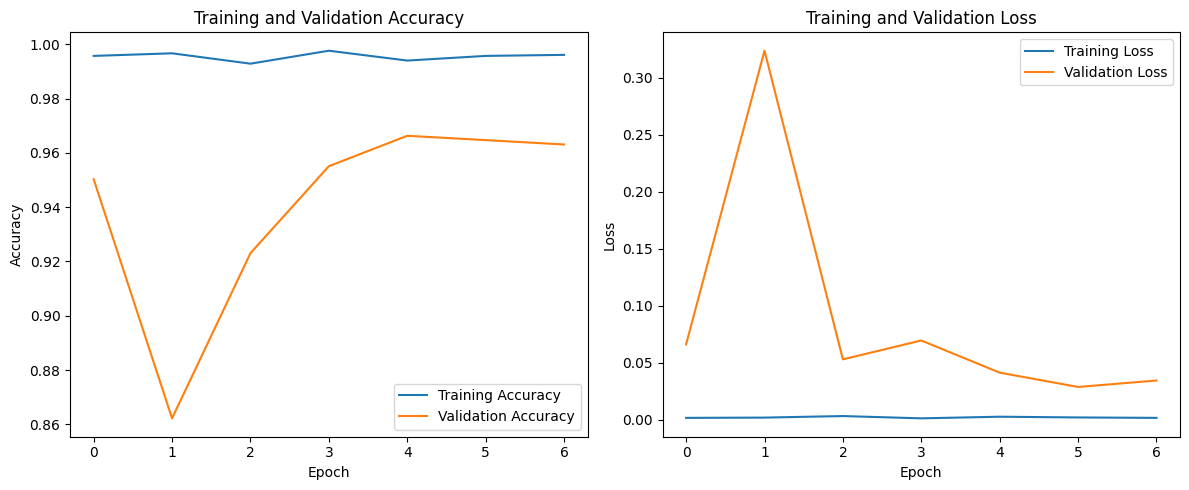

In [65]:
accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [66]:
model4.save('inceptionv3.h5')

In [67]:
predicted_labels = (predictions>0.5).astype(int)

Confusion Matrix:
[[224  10]
 [ 13 377]]
F1 Score: 0.9703989703989704


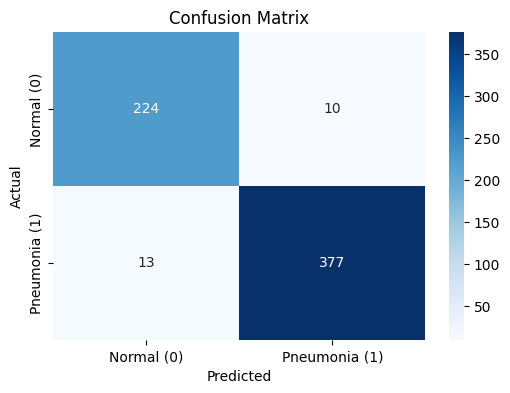

In [68]:
confusion = confusion_matrix(true_labels, predicted_labels)

# Compute F1 score
f1 = f1_score(true_labels, predicted_labels)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("F1 Score:", f1)

# Create a heatmap for the confusion matrix using Seaborn
labels = ['Normal (0)', 'Pneumonia (1)']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**MODEL5 -> VGG19**

In [69]:
vgg16 = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3),
)

58889256/58889256 [==============================] - 0s 0us/step


In [70]:
x5 = tf.keras.layers.Flatten()(vgg16.output)
x5 = tf.keras.layers.Dense(32, activation='relu')(x5)
x5 = tf.keras.layers.Dropout(0.25)(x5)
prediction5 = tf.keras.layers.Dense(1,activation='sigmoid')(x5)
model5 = tf.keras.models.Model(vgg16.input, prediction5)

In [71]:
model5.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001),
               loss = tf.keras.losses.BinaryFocalCrossentropy(gamma=3),
               metrics = ['accuracy', precision, recall]
               )

In [72]:
history5 = model5.fit(
    train_generator,
    validation_data = test_generator,
    epochs = 40,
    verbose = 2,
    callbacks = [callback]
)

Epoch 1/40
82/82 - 194s - loss: 0.0945 - accuracy: 0.7068 - precision: 0.7693 - recall: 0.9078 - val_loss: 0.0809 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 1.0000 - 194s/epoch - 2s/step
Epoch 2/40
82/82 - 135s - loss: 0.0613 - accuracy: 0.7662 - precision: 0.7963 - recall: 0.9204 - val_loss: 0.0583 - val_accuracy: 0.8061 - val_precision: 0.9353 - val_recall: 0.7410 - 135s/epoch - 2s/step
Epoch 3/40
82/82 - 131s - loss: 0.0435 - accuracy: 0.8469 - precision: 0.9005 - recall: 0.8924 - val_loss: 0.0569 - val_accuracy: 0.7821 - val_precision: 0.7461 - val_recall: 0.9872 - 131s/epoch - 2s/step
Epoch 4/40
82/82 - 132s - loss: 0.0390 - accuracy: 0.8740 - precision: 0.9135 - recall: 0.9171 - val_loss: 0.0490 - val_accuracy: 0.8478 - val_precision: 0.9743 - val_recall: 0.7769 - 132s/epoch - 2s/step
Epoch 5/40
82/82 - 130s - loss: 0.0329 - accuracy: 0.9031 - precision: 0.9335 - recall: 0.9361 - val_loss: 0.0500 - val_accuracy: 0.8349 - val_precision: 0.9705 - val_recall: 0.759

In [73]:
model5.save('vgg19.h5')

In [145]:
predictions = model5.predict(test_generator)

20/20 [==============================] - 7s 351ms/step


In [149]:
predicted_labels = (predictions>0.5).astype(int)

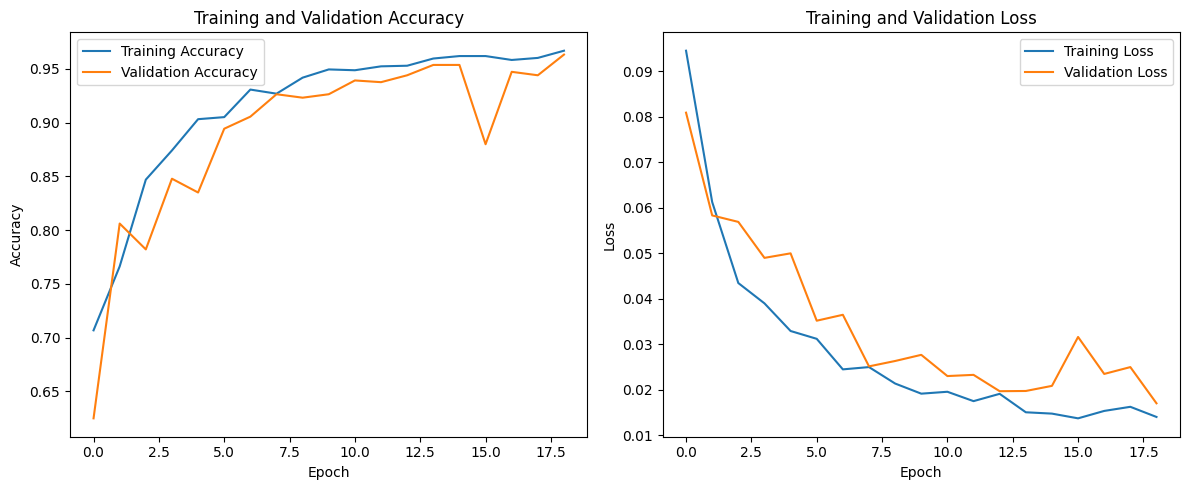

In [147]:
accuracy = history5.history['accuracy']
val_accuracy = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Confusion Matrix:
[[226   8]
 [ 15 375]]
F1 Score: 0.9702457956015524


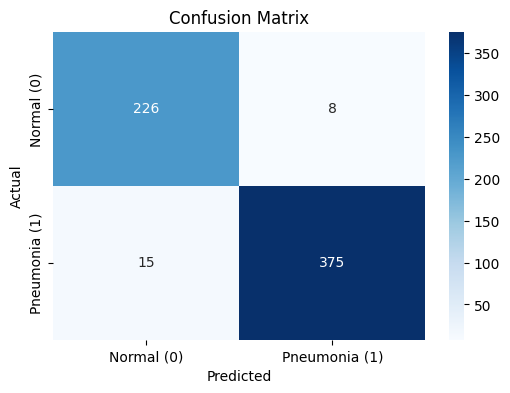

In [150]:
confusion = confusion_matrix(true_labels, predicted_labels)

# Compute F1 score
f1 = f1_score(true_labels, predicted_labels)

# Print the results
print("Confusion Matrix:")
print(confusion)
print("F1 Score:", f1)

# Create a heatmap for the confusion matrix using Seaborn
labels = ['Normal (0)', 'Pneumonia (1)']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Ensemble**

In [110]:
# Make predictions on the validation dataset using your individual models
predictions_model1 = model1.predict(test_generator)
predictions_model2 = model2.predict(test_generator)
predictions_model3 = model3.predict(test_generator)
predictions_model4 = model4.predict(test_generator)
predictions_model5 = model5.predict(test_generator)

20/20 [==============================] - 6s 303ms/step


In [111]:
true_labels = test_generator.classes  # Assuming 'test_generator' is configured properly

In [312]:
#Weights for individual models
weight_model1 = 0.11
weight_model2 = 0.1425
weight_model3 = 0.2276
weight_model4 = 0.372
weight_model5 = 0.1762

# Calculate the weighted sum of predictions
weighted_sum = (weight_model1 * predictions_model1) + (weight_model2 * predictions_model2) + (weight_model3 * predictions_model3) + (weight_model4 * predictions_model4) + + (weight_model5 * predictions_model5)

# Define a threshold for the weighted sum (e.g., 0.5)
threshold = 0.55

# Make the ensemble prediction based on the threshold
ensemble_predictions = (weighted_sum > threshold).astype(int)

# Evaluate the ensemble's performance
accuracy = accuracy_score(true_labels, ensemble_predictions)
precision = precision_score(true_labels, ensemble_predictions)
recall = recall_score(true_labels, ensemble_predictions)
f1 = f1_score(true_labels, ensemble_predictions)

print("Ensemble Accuracy:", accuracy)
print("Ensemble Precision:", precision)
print("Ensemble Recall:", recall)
print("Ensemble F1 Score:", f1)


Ensemble Accuracy: 0.9759615384615384
Ensemble Precision: 0.9844961240310077
Ensemble Recall: 0.9769230769230769
Ensemble F1 Score: 0.9806949806949806


In [151]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=2d20907c9012c837a459357617868fcc55b3faef0f71c9aac8c2db4a3f4af48b
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [302]:
predictions_models = [predictions_model1,predictions_model2,predictions_model3,predictions_model4,predictions_model5]
weights = [0.2, 0.1, 0.3, 0.1, 0.3]

In [311]:
from pyswarm import pso
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define the objective function for PSO
def objective(weights):
    # Calculate the weighted sum of predictions
    weighted_sum = sum(weights[i] * predictions_models[i] for i in range(len(weights)))
    
    # Make predictions based on a threshold
    ensemble_predictions = (weighted_sum > threshold).astype(int)
    
    # Calculate the F1 score (you can choose other metrics if needed)
    f1 = f1_score(true_labels, ensemble_predictions)
    
    # We want to maximize F1 score, so return its negative value
    return -f1

# Define the lower and upper bounds for the weights (0 to 1 for each weight)
lb = [0.11] * len(predictions_models)
ub = [0.5] * len(predictions_models)

# Use PSO to find the optimal weights
best_weights, _ = pso(objective, lb, ub, swarmsize=10, maxiter=100)

# Print the best weights found by PSO
print("Optimal Weights:", best_weights)

# Calculate ensemble predictions using the optimal weights
weighted_sum = sum(best_weights[i] * predictions_models[i] for i in range(len(best_weights)))
ensemble_predictions = (weighted_sum > threshold).astype(int)

# Evaluate the ensemble's performance
accuracy = accuracy_score(true_labels, ensemble_predictions)
precision = precision_score(true_labels, ensemble_predictions)
recall = recall_score(true_labels, ensemble_predictions)
f1 = f1_score(true_labels, ensemble_predictions)

print("Ensemble Accuracy:", accuracy)
print("Ensemble Precision:", precision)
print("Ensemble Recall:", recall)
print("Ensemble F1 Score:", f1)

Stopping search: maximum iterations reached --> 100
Optimal Weights: [0.11       0.14253976 0.22755729 0.37199138 0.17616363]
Ensemble Accuracy: 0.9759615384615384
Ensemble Precision: 0.9844961240310077
Ensemble Recall: 0.9769230769230769
Ensemble F1 Score: 0.9806949806949806
